In [1]:
from collections import deque
import numpy as np 
import matplotlib.pyplot as plt

class Processo:
    def __init__(self, nome, tempo_chegada, burst_time):
      
        self.nome = nome  
        self.tempo_chegada = tempo_chegada 
        self.burst_time = burst_time  
        self.tempo_restante = burst_time  
        self.tempo_espera = 0  
        self.tempo_retorno = 0 

In [2]:
def round_robin(processos, quantum):

    tempo_atual = 0  
    fila_de_prontos = deque(processos)  # Cria uma fila de prontos com os processos
    processo_atual = None  
    sequencia_execucao = [] 

    while fila_de_prontos or processo_atual:  # Executa enquanto houver processos na fila de prontos ou um processo em execução
        if processo_atual is None and fila_de_prontos:  
            processo_atual = fila_de_prontos.popleft()  

        if processo_atual:  # Verifica se há um processo em execução
            sequencia_execucao.append(processo_atual.nome)  
            tempo_execucao = min(quantum, processo_atual.tempo_restante)  
            processo_atual.tempo_restante -= tempo_execucao 

            # Atualização do tempo de espera para os processos na fila de prontos
            for processo in fila_de_prontos:
                processo.tempo_espera += tempo_execucao

            tempo_atual += tempo_execucao  # Atualiza o tempo atual

            if processo_atual.tempo_restante == 0:  # Verifica se o processo terminou sua execução
                processo_atual.tempo_retorno = tempo_atual - processo_atual.tempo_chegada
                processo_atual = None 
            else:
                fila_de_prontos.append(processo_atual)  
                processo_atual = None  
                tempo_atual += 1  
        else:
            tempo_atual += 1  # Caso não haja processo em execução, apenas avança o tempo

    return sequencia_execucao  # Retorna a sequência de execução dos processos

In [3]:
def calcular_metricas(processos):

    tempos_espera = [p.tempo_espera for p in processos]  # Lista com os tempos de espera dos processos
    tempos_retorno = [p.tempo_retorno for p in processos]  # Lista com os tempos de retorno dos processos

    tempo_medio_espera = np.mean(tempos_espera)  # Calcula o tempo médio de espera
    tempo_medio_retorno = np.mean(tempos_retorno)  # Calcula o tempo médio de retorno
    vazao = len(processos) / max(p.tempo_retorno for p in processos)  # Calcula a vazão

    return tempo_medio_espera, tempo_medio_retorno, vazao  # Retorna as métricas calculadas

In [4]:
# Função para simulação
def simulacao(processos, quantums):
    resultados = {'quantum': [], 'tempo_medio_espera': [], 'tempo_medio_retorno': [], 'vazao': []}
    
    for quantum in quantums:
        print(f"Simulação com Quantum = {quantum}")
        for p in processos:
            p.tempo_restante = p.burst_time
            p.tempo_espera = 0
            p.tempo_retorno = 0

        sequencia_execucao = round_robin(processos, quantum)
        print("Sequência de execução dos processos:", sequencia_execucao)

        tempo_medio_espera, tempo_medio_retorno, vazao = calcular_metricas(processos)

        print(f"Tempo médio de espera: {tempo_medio_espera}")
        print(f"Tempo médio de retorno: {tempo_medio_retorno}")
        print(f"Vazão: {vazao}\n")
        
        resultados['quantum'].append(quantum)
        resultados['tempo_medio_espera'].append(tempo_medio_espera)
        resultados['tempo_medio_retorno'].append(tempo_medio_retorno)
        resultados['vazao'].append(vazao)
    
    return resultados

In [5]:
# Exemplo de uso
processos = [
    Processo("P1", 0, 8),
    Processo("P2", 0, 4),
    Processo("P3", 0, 9),
    Processo("P4", 0, 5)
]

quantums = [1, 4, 10]

resultados=simulacao(processos, quantums)


Simulação com Quantum = 1
Sequência de execução dos processos: ['P1', 'P2', 'P3', 'P4', 'P1', 'P2', 'P3', 'P4', 'P1', 'P2', 'P3', 'P4', 'P1', 'P2', 'P3', 'P4', 'P1', 'P3', 'P4', 'P1', 'P3', 'P1', 'P3', 'P1', 'P3', 'P3']
Tempo médio de espera: 14.25
Tempo médio de retorno: 39.0
Vazão: 0.08333333333333333

Simulação com Quantum = 4
Sequência de execução dos processos: ['P1', 'P2', 'P3', 'P4', 'P1', 'P3', 'P4', 'P3']
Tempo médio de espera: 13.25
Tempo médio de retorno: 22.75
Vazão: 0.13333333333333333

Simulação com Quantum = 10
Sequência de execução dos processos: ['P1', 'P2', 'P3', 'P4']
Tempo médio de espera: 10.25
Tempo médio de retorno: 16.75
Vazão: 0.15384615384615385



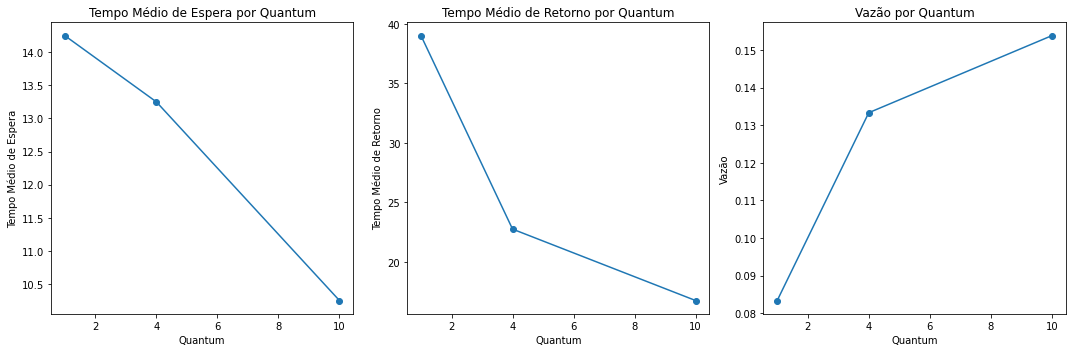

In [6]:

plt.figure(figsize=(15, 5))

# Gráfico do Tempo Médio de Espera por Quantum
plt.subplot(1, 3, 1)
plt.plot(resultados['quantum'], resultados['tempo_medio_espera'], marker='o')
plt.title('Tempo Médio de Espera por Quantum')
plt.xlabel('Quantum')
plt.ylabel('Tempo Médio de Espera')

# Gráfico do Tempo Médio de Retorno por Quantum
plt.subplot(1, 3, 2)
plt.plot(resultados['quantum'], resultados['tempo_medio_retorno'], marker='o')
plt.title('Tempo Médio de Retorno por Quantum')
plt.xlabel('Quantum')
plt.ylabel('Tempo Médio de Retorno')

# Gráfico da Vazão por Quantum
plt.subplot(1, 3, 3)
plt.plot(resultados['quantum'], resultados['vazao'], marker='o')
plt.title('Vazão por Quantum')
plt.xlabel('Quantum')
plt.ylabel('Vazão')

plt.tight_layout()
plt.show()
